In [89]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from collections import Counter
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [22]:
df = pd.read_csv("branch_topics_ending.csv", sep=",")

# Step 1: Explode topic strings
df["topics"] = df["topics"].str.split(" - ")
df = df.explode("topics")
df["topics"] = df["topics"].str.strip()

In [23]:
df

,branch_id,topics,ending
0,0,Trump support,disagreement
0,0,Media bypass,disagreement
0,0,Popularity assessment,disagreement
1,1,Media bias,inconclusive
1,1,Trump's communication,inconclusive
...,...,...,...
4625,4625,criticism of Trump,inconclusive
4625,4625,comparison to Joe Rogan interview,inconclusive
4626,4626,dislike count,inconclusive
4626,4626,YouTube extension,inconclusive


In [24]:
# Step 2: Get unique topic phrases
unique_topics = df["topics"].unique().tolist()

In [25]:
# Step 3: Embed them
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(unique_topics)

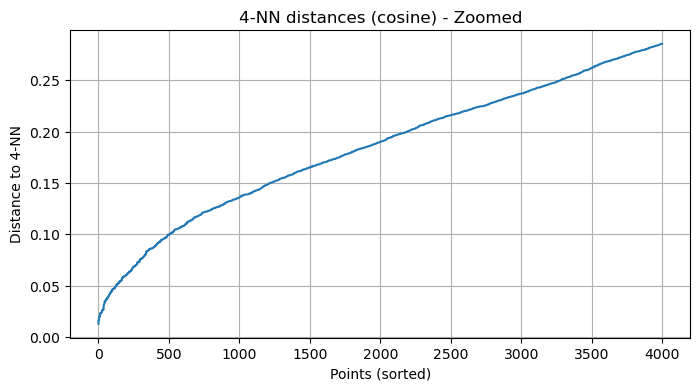

In [64]:
# Step 4a: Find EPS value for DBSCAN

# embeddings: your list of topic sentence embeddings
min_samples = 4  # same as you'll use in DBSCAN

neighbors = NearestNeighbors(n_neighbors=min_samples, metric='cosine')
neighbors_fit = neighbors.fit(embeddings)
distances, indices = neighbors_fit.kneighbors(embeddings)

# Get distance to the k-th nearest neighbor for each point
k_distances = np.sort(distances[:, -1])

# Plot the sorted k-distances
plt.figure(figsize=(8, 4))
plt.plot(k_distances[:4000])
plt.title(f"{min_samples}-NN distances (cosine) - Zoomed")
plt.xlabel("Points (sorted)")
plt.ylabel("Distance to {}-NN".format(min_samples))
plt.grid(True)
plt.show()

In [65]:
# Step 4b: Cluster

eps = 0.1  # There's not a clear elbow, so probably really small
min_samples = 4

dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="cosine")
labels = dbscan.fit_predict(embeddings)

In [66]:
# Step 5: Map each original topic to macro cluster
topic_to_cluster = {
    topic: f"macro_topic_{label}" if label != -1 else "noise"
    for topic, label in zip(unique_topics, labels)
}
df["macro_topic"] = df["topics"].map(topic_to_cluster)

In [67]:
df

,branch_id,topics,ending,macro_topic
0,0,Trump support,disagreement,macro_topic_0
0,0,Media bypass,disagreement,noise
0,0,Popularity assessment,disagreement,noise
1,1,Media bias,inconclusive,macro_topic_1
1,1,Trump's communication,inconclusive,noise
...,...,...,...,...
4625,4625,criticism of Trump,inconclusive,macro_topic_19
4625,4625,comparison to Joe Rogan interview,inconclusive,macro_topic_7
4626,4626,dislike count,inconclusive,noise
4626,4626,YouTube extension,inconclusive,noise


In [90]:
# Print topics by size
Counter(df["macro_topic"])

Counter({'noise': 12253,
         'macro_topic_1': 459,
         'macro_topic_0': 190,
         'macro_topic_4': 137,
         'macro_topic_3': 123,
         'macro_topic_18': 107,
         'macro_topic_20': 96,
         'macro_topic_19': 95,
         'macro_topic_26': 95,
         'macro_topic_72': 74,
         'macro_topic_2': 70,
         'macro_topic_24': 57,
         'macro_topic_5': 51,
         'macro_topic_16': 50,
         'macro_topic_76': 50,
         'macro_topic_116': 49,
         'macro_topic_75': 44,
         'macro_topic_14': 43,
         'macro_topic_58': 42,
         'macro_topic_77': 42,
         'macro_topic_69': 39,
         'macro_topic_29': 38,
         'macro_topic_8': 36,
         'macro_topic_81': 36,
         'macro_topic_37': 35,
         'macro_topic_85': 35,
         'macro_topic_106': 30,
         'macro_topic_91': 29,
         'macro_topic_21': 28,
         'macro_topic_92': 25,
         'macro_topic_79': 24,
         'macro_topic_22': 23,
         'macr

In [117]:
topics_names = {
    "macro_topic_1": "Media Bias",
    "macro_topic_5": "Interviews/Podcasts",
    "macro_topic_11": "Ukraine War",
    "macro_topic_24": "Tariffs and Economy",
    "macro_topic_20": "Trump",
    "macro_topic_69": "Harris",
    "macro_topic_18": "Cognitive Decline",
    "macro_topic_77": "2020 Elections Denial",
    "macro_topic_106": "Abortion Rights",
    "macro_topic_75": "Election Predictions",

    "macro_topic_0": "Trump",
    "macro_topic_3": "Trump",
    "macro_topic_15": "Trump",
    "macro_topic_19": "Trump",
    "macro_topic_76": "Harris",
    "macro_topic_116": "Harris",
    "macro_topic_92": "Harris",
    "macro_topic_4": "Interviews/Podcasts",
    "macro_topic_72": "Interviews/Podcasts",
    "macro_topic_81": "Interviews/Podcasts",
    "macro_topic_37": "Interviews/Podcasts",
    "macro_topic_85": "Interviews/Podcasts",
    "macro_topic_16": "Tariffs and Economy",
    "macro_topic_25": "Tariffs and Economy",
    "macro_topic_29": "Election Predictions",
}

In [123]:
df["macro_topic_name"] = df["macro_topic"].map(topics_names)
df["macro_topic_name"] = df["macro_topic_name"].fillna("Other")

In [124]:
df

,branch_id,topics,ending,macro_topic,macro_topic_name
0,0,Trump support,disagreement,macro_topic_0,Trump
0,0,Media bypass,disagreement,noise,Other
0,0,Popularity assessment,disagreement,noise,Other
1,1,Media bias,inconclusive,macro_topic_1,Media Bias
1,1,Trump's communication,inconclusive,noise,Other
...,...,...,...,...,...
4625,4625,criticism of Trump,inconclusive,macro_topic_19,Trump
4625,4625,comparison to Joe Rogan interview,inconclusive,macro_topic_7,Other
4626,4626,dislike count,inconclusive,noise,Other
4626,4626,YouTube extension,inconclusive,noise,Other


In [125]:
selected_df = df[["branch_id", "ending", "macro_topic_name"]]

In [126]:
selected_df

,branch_id,ending,macro_topic_name
0,0,disagreement,Trump
0,0,disagreement,Other
0,0,disagreement,Other
1,1,inconclusive,Media Bias
1,1,inconclusive,Other
...,...,...,...
4625,4625,inconclusive,Trump
4625,4625,inconclusive,Other
4626,4626,inconclusive,Other
4626,4626,inconclusive,Other


In [127]:
selected_df.to_csv("branch_topcis_ending_2.csv", index=False)